# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.majority, past=Past.last_bin, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 11152 substitutions for model Model(time=Time.continuous, source=Source.majority, past=Past.last_bin, durl=Durl.all)


  0% (    1 of 11152) |           | Elapsed Time: 0:00:27 ETA:  3 days, 14:28:36

  0% (   75 of 11152) |                    | Elapsed Time: 0:00:28 ETA:  0:02:03

  1% (  140 of 11152) |                    | Elapsed Time: 0:00:29 ETA:  0:02:05

  1% (  209 of 11152) |                    | Elapsed Time: 0:00:30 ETA:  0:02:06

  2% (  279 of 11152) |                    | Elapsed Time: 0:00:31 ETA:  0:02:04

  3% (  355 of 11152) |                    | Elapsed Time: 0:00:32 ETA:  0:02:01

  3% (  419 of 11152) |                    | Elapsed Time: 0:00:33 ETA:  0:01:59

  4% (  494 of 11152) |                    | Elapsed Time: 0:00:34 ETA:  0:01:58

  5% (  558 of 11152) |#                   | Elapsed Time: 0:00:35 ETA:  0:01:57

  5% (  626 of 11152) |#                   | Elapsed Time: 0:00:36 ETA:  0:01:57

  6% (  698 of 11152) |#                   | Elapsed Time: 0:00:37 ETA:  0:01:57

  6% (  768 of 11152) |#                   | Elapsed Time: 0:00:38 ETA:  0:01:56

  7% (  837 of 11152) |#                   | Elapsed Time: 0:00:39 ETA:  0:01:56

  8% (  906 of 11152) |#                   | Elapsed Time: 0:00:40 ETA:  0:01:57

  8% (  958 of 11152) |#                   | Elapsed Time: 0:00:41 ETA:  0:02:03

  8% (  976 of 11152) |#                   | Elapsed Time: 0:00:41 ETA:  0:02:06

  9% ( 1035 of 11152) |#                   | Elapsed Time: 0:00:42 ETA:  0:02:10

 10% ( 1116 of 11152) |##                  | Elapsed Time: 0:00:44 ETA:  0:02:11

 10% ( 1178 of 11152) |##                  | Elapsed Time: 0:00:45 ETA:  0:02:13

 11% ( 1255 of 11152) |##                  | Elapsed Time: 0:00:46 ETA:  0:02:10

 11% ( 1319 of 11152) |##                  | Elapsed Time: 0:00:47 ETA:  0:02:11

 12% ( 1381 of 11152) |##                  | Elapsed Time: 0:00:48 ETA:  0:02:06

 12% ( 1395 of 11152) |##                  | Elapsed Time: 0:00:48 ETA:  0:02:05

 13% ( 1457 of 11152) |##                  | Elapsed Time: 0:00:49 ETA:  0:02:02

 13% ( 1516 of 11152) |##                  | Elapsed Time: 0:00:50 ETA:  0:02:06

 13% ( 1534 of 11152) |##                  | Elapsed Time: 0:00:50 ETA:  0:02:08

 14% ( 1590 of 11152) |##                  | Elapsed Time: 0:00:51 ETA:  0:02:10

 14% ( 1656 of 11152) |##                  | Elapsed Time: 0:00:52 ETA:  0:02:10

 15% ( 1673 of 11152) |###                 | Elapsed Time: 0:00:53 ETA:  0:02:09

 15% ( 1744 of 11152) |###                 | Elapsed Time: 0:00:54 ETA:  0:02:05

 16% ( 1813 of 11152) |###                 | Elapsed Time: 0:00:55 ETA:  0:01:58

 16% ( 1891 of 11152) |###                 | Elapsed Time: 0:00:56 ETA:  0:01:53

 17% ( 1952 of 11152) |###                 | Elapsed Time: 0:00:56 ETA:  0:01:47

 17% ( 1995 of 11152) |###                 | Elapsed Time: 0:00:58 ETA:  0:02:04

 18% ( 2066 of 11152) |###                 | Elapsed Time: 0:00:59 ETA:  0:01:59

 18% ( 2092 of 11152) |###                 | Elapsed Time: 0:00:59 ETA:  0:01:56

 19% ( 2158 of 11152) |###                 | Elapsed Time: 0:01:00 ETA:  0:01:55

 20% ( 2231 of 11152) |####                | Elapsed Time: 0:01:01 ETA:  0:01:56

 20% ( 2296 of 11152) |####                | Elapsed Time: 0:01:02 ETA:  0:01:59

 21% ( 2370 of 11152) |####                | Elapsed Time: 0:01:03 ETA:  0:02:06

 21% ( 2441 of 11152) |####                | Elapsed Time: 0:01:04 ETA:  0:01:39

 22% ( 2510 of 11152) |####                | Elapsed Time: 0:01:05 ETA:  0:01:36

 23% ( 2584 of 11152) |####                | Elapsed Time: 0:01:06 ETA:  0:01:33

 23% ( 2649 of 11152) |####                | Elapsed Time: 0:01:07 ETA:  0:01:30

 24% ( 2727 of 11152) |####                | Elapsed Time: 0:01:08 ETA:  0:01:25

 25% ( 2789 of 11152) |#####               | Elapsed Time: 0:01:09 ETA:  0:01:24

 25% ( 2864 of 11152) |#####               | Elapsed Time: 0:01:10 ETA:  0:01:20

 26% ( 2928 of 11152) |#####               | Elapsed Time: 0:01:11 ETA:  0:01:19

 26% ( 3004 of 11152) |#####               | Elapsed Time: 0:01:12 ETA:  0:01:18

 27% ( 3067 of 11152) |#####               | Elapsed Time: 0:01:13 ETA:  0:01:17

 28% ( 3140 of 11152) |#####               | Elapsed Time: 0:01:14 ETA:  0:01:17

 28% ( 3207 of 11152) |#####               | Elapsed Time: 0:01:15 ETA:  0:01:15

 29% ( 3280 of 11152) |#####               | Elapsed Time: 0:01:16 ETA:  0:01:14

 30% ( 3346 of 11152) |######              | Elapsed Time: 0:01:17 ETA:  0:01:14

 30% ( 3418 of 11152) |######              | Elapsed Time: 0:01:18 ETA:  0:01:14

 31% ( 3486 of 11152) |######              | Elapsed Time: 0:01:19 ETA:  0:01:13

 31% ( 3560 of 11152) |######              | Elapsed Time: 0:01:20 ETA:  0:01:11

 32% ( 3625 of 11152) |######              | Elapsed Time: 0:01:20 ETA:  0:01:10

 33% ( 3701 of 11152) |######              | Elapsed Time: 0:01:21 ETA:  0:01:08

 33% ( 3764 of 11152) |######              | Elapsed Time: 0:01:22 ETA:  0:01:06

 34% ( 3836 of 11152) |######              | Elapsed Time: 0:01:23 ETA:  0:01:06

 35% ( 3904 of 11152) |#######             | Elapsed Time: 0:01:24 ETA:  0:01:04

 35% ( 3973 of 11152) |#######             | Elapsed Time: 0:01:25 ETA:  0:01:05

 36% ( 4043 of 11152) |#######             | Elapsed Time: 0:01:26 ETA:  0:01:04

 36% ( 4113 of 11152) |#######             | Elapsed Time: 0:01:27 ETA:  0:01:05

 37% ( 4183 of 11152) |#######             | Elapsed Time: 0:01:28 ETA:  0:01:07

 38% ( 4256 of 11152) |#######             | Elapsed Time: 0:01:29 ETA:  0:01:07

 38% ( 4322 of 11152) |#######             | Elapsed Time: 0:01:30 ETA:  0:01:07

 39% ( 4394 of 11152) |#######             | Elapsed Time: 0:01:31 ETA:  0:01:06

 40% ( 4461 of 11152) |########            | Elapsed Time: 0:01:32 ETA:  0:01:08

 40% ( 4532 of 11152) |########            | Elapsed Time: 0:01:33 ETA:  0:01:06

 41% ( 4601 of 11152) |########            | Elapsed Time: 0:01:34 ETA:  0:01:05

 41% ( 4675 of 11152) |########            | Elapsed Time: 0:01:35 ETA:  0:01:03

 42% ( 4740 of 11152) |########            | Elapsed Time: 0:01:36 ETA:  0:01:00

 43% ( 4814 of 11152) |########            | Elapsed Time: 0:01:37 ETA:  0:00:58

 43% ( 4880 of 11152) |########            | Elapsed Time: 0:01:38 ETA:  0:00:57

 44% ( 4952 of 11152) |########            | Elapsed Time: 0:01:39 ETA:  0:00:56

 45% ( 5019 of 11152) |#########           | Elapsed Time: 0:01:40 ETA:  0:00:54

 45% ( 5090 of 11152) |#########           | Elapsed Time: 0:01:41 ETA:  0:00:52

 46% ( 5158 of 11152) |#########           | Elapsed Time: 0:01:42 ETA:  0:00:52

 46% ( 5229 of 11152) |#########           | Elapsed Time: 0:01:43 ETA:  0:00:51

 47% ( 5272 of 11152) |#########           | Elapsed Time: 0:01:45 ETA:  0:01:11

 47% ( 5298 of 11152) |#########           | Elapsed Time: 0:01:45 ETA:  0:01:13

 48% ( 5367 of 11152) |#########           | Elapsed Time: 0:01:46 ETA:  0:01:13

 48% ( 5437 of 11152) |#########           | Elapsed Time: 0:01:47 ETA:  0:01:17

 49% ( 5511 of 11152) |#########           | Elapsed Time: 0:01:48 ETA:  0:01:17

 50% ( 5577 of 11152) |##########          | Elapsed Time: 0:01:49 ETA:  0:01:22

 50% ( 5650 of 11152) |##########          | Elapsed Time: 0:01:50 ETA:  0:01:20

 51% ( 5716 of 11152) |##########          | Elapsed Time: 0:01:51 ETA:  0:00:47

 51% ( 5788 of 11152) |##########          | Elapsed Time: 0:01:52 ETA:  0:00:45

 52% ( 5855 of 11152) |##########          | Elapsed Time: 0:01:53 ETA:  0:00:43

 53% ( 5928 of 11152) |##########          | Elapsed Time: 0:01:54 ETA:  0:00:40

 53% ( 5995 of 11152) |##########          | Elapsed Time: 0:01:55 ETA:  0:00:42

 54% ( 6072 of 11152) |##########          | Elapsed Time: 0:01:56 ETA:  0:00:37

 55% ( 6134 of 11152) |###########         | Elapsed Time: 0:01:57 ETA:  0:00:36

 55% ( 6208 of 11152) |###########         | Elapsed Time: 0:01:58 ETA:  0:00:35

 56% ( 6274 of 11152) |###########         | Elapsed Time: 0:01:59 ETA:  0:00:35

 56% ( 6353 of 11152) |###########         | Elapsed Time: 0:02:00 ETA:  0:00:32

 57% ( 6413 of 11152) |###########         | Elapsed Time: 0:02:01 ETA:  0:00:32

 58% ( 6484 of 11152) |###########         | Elapsed Time: 0:02:02 ETA:  0:00:32

 58% ( 6552 of 11152) |###########         | Elapsed Time: 0:02:03 ETA:  0:00:30

 59% ( 6621 of 11152) |###########         | Elapsed Time: 0:02:04 ETA:  0:00:30

 60% ( 6692 of 11152) |############        | Elapsed Time: 0:02:05 ETA:  0:00:30

 60% ( 6771 of 11152) |############        | Elapsed Time: 0:02:06 ETA:  0:00:27

 61% ( 6831 of 11152) |############        | Elapsed Time: 0:02:07 ETA:  0:00:27

 61% ( 6906 of 11152) |############        | Elapsed Time: 0:02:08 ETA:  0:00:26

 62% ( 6971 of 11152) |############        | Elapsed Time: 0:02:08 ETA:  0:00:27

 63% ( 7046 of 11152) |############        | Elapsed Time: 0:02:10 ETA:  0:00:26

 63% ( 7110 of 11152) |############        | Elapsed Time: 0:02:10 ETA:  0:00:24

 64% ( 7183 of 11152) |############        | Elapsed Time: 0:02:11 ETA:  0:00:22

 65% ( 7249 of 11152) |#############       | Elapsed Time: 0:02:12 ETA:  0:00:19

 65% ( 7318 of 11152) |#############       | Elapsed Time: 0:02:13 ETA:  0:00:19

 66% ( 7389 of 11152) |#############       | Elapsed Time: 0:02:14 ETA:  0:00:19

 66% ( 7464 of 11152) |#############       | Elapsed Time: 0:02:15 ETA:  0:00:16

 67% ( 7528 of 11152) |#############       | Elapsed Time: 0:02:16 ETA:  0:00:14

 68% ( 7599 of 11152) |#############       | Elapsed Time: 0:02:17 ETA:  0:00:13

 68% ( 7668 of 11152) |#############       | Elapsed Time: 0:02:18 ETA:  0:00:13

 69% ( 7738 of 11152) |#############       | Elapsed Time: 0:02:19 ETA:  0:00:13

 70% ( 7807 of 11152) |##############      | Elapsed Time: 0:02:20 ETA:  0:00:12

 70% ( 7882 of 11152) |##############      | Elapsed Time: 0:02:21 ETA:  0:00:11

 71% ( 7946 of 11152) |##############      | Elapsed Time: 0:02:22 ETA:  0:00:10

 71% ( 8016 of 11152) |##############      | Elapsed Time: 0:02:23 ETA:  0:00:11

 72% ( 8086 of 11152) |##############      | Elapsed Time: 0:02:24 ETA:  0:00:15

 73% ( 8155 of 11152) |##############      | Elapsed Time: 0:02:25 ETA:  0:00:14

 73% ( 8225 of 11152) |##############      | Elapsed Time: 0:02:26 ETA:  0:00:15

 74% ( 8289 of 11152) |##############      | Elapsed Time: 0:02:27 ETA:  0:00:17

 75% ( 8365 of 11152) |###############     | Elapsed Time: 0:02:28 ETA:  0:00:17

 75% ( 8438 of 11152) |###############     | Elapsed Time: 0:02:29 ETA:  0:00:15

 76% ( 8504 of 11152) |###############     | Elapsed Time: 0:02:30 ETA:  0:00:14

 76% ( 8585 of 11152) |###############     | Elapsed Time: 0:02:31 ETA:  0:00:08

 77% ( 8643 of 11152) |###############     | Elapsed Time: 0:02:32 ETA:  0:00:06

 78% ( 8716 of 11152) |###############     | Elapsed Time: 0:02:33 ETA:  0:00:02

 78% ( 8783 of 11152) |###############     | Elapsed Time: 0:02:34 ETA:  0:00:00

 79% ( 8859 of 11152) |###############     | Elapsed Time: 0:02:35 ETA:  0:00:00

 80% ( 8922 of 11152) |################    | Elapsed Time: 0:02:36 ETA:  0:00:00

 80% ( 8990 of 11152) |################    | Elapsed Time: 0:02:37 ETA:  0:00:00

 81% ( 9062 of 11152) |################    | Elapsed Time: 0:02:38 ETA:  0:00:00

 81% ( 9130 of 11152) |################    | Elapsed Time: 0:02:39 ETA:  0:00:00

 82% ( 9201 of 11152) |################    | Elapsed Time: 0:02:40 ETA:  0:00:00

 83% ( 9257 of 11152) |################    | Elapsed Time: 0:02:41 ETA:  0:00:01

 83% ( 9296 of 11152) |################    | Elapsed Time: 0:02:43 ETA:  0:00:37

 83% ( 9340 of 11152) |################    | Elapsed Time: 0:02:44 ETA:  0:00:44

 84% ( 9399 of 11152) |################    | Elapsed Time: 0:02:45 ETA:  0:00:47

 84% ( 9463 of 11152) |################    | Elapsed Time: 0:02:46 ETA:  0:00:48

 85% ( 9480 of 11152) |#################   | Elapsed Time: 0:02:46 ETA:  0:00:59

 85% ( 9546 of 11152) |#################   | Elapsed Time: 0:02:47 ETA:  0:00:59

 86% ( 9619 of 11152) |#################   | Elapsed Time: 0:02:48 ETA:  0:00:55

 86% ( 9692 of 11152) |#################   | Elapsed Time: 0:02:49 ETA:  0:00:46

 87% ( 9759 of 11152) |#################   | Elapsed Time: 0:02:50 ETA:  0:00:00

 88% ( 9826 of 11152) |#################   | Elapsed Time: 0:02:51 ETA:  0:00:00

 88% ( 9898 of 11152) |#################   | Elapsed Time: 0:02:52 ETA:  0:00:00

 89% ( 9962 of 11152) |#################   | Elapsed Time: 0:02:53 ETA:  0:00:00

 90% (10037 of 11152) |##################  | Elapsed Time: 0:02:54 ETA:  0:00:00

 90% (10114 of 11152) |##################  | Elapsed Time: 0:02:55 ETA:  0:00:00

 91% (10177 of 11152) |##################  | Elapsed Time: 0:02:56 ETA:  0:00:00

 91% (10247 of 11152) |##################  | Elapsed Time: 0:02:57 ETA:  0:00:00

 92% (10316 of 11152) |##################  | Elapsed Time: 0:02:58 ETA:  0:00:00

 93% (10389 of 11152) |##################  | Elapsed Time: 0:02:59 ETA:  0:00:00

 93% (10456 of 11152) |##################  | Elapsed Time: 0:03:00 ETA:  0:00:00

 94% (10526 of 11152) |##################  | Elapsed Time: 0:03:01 ETA:  0:00:00

 95% (10595 of 11152) |################### | Elapsed Time: 0:03:02 ETA:  0:00:00

 95% (10662 of 11152) |################### | Elapsed Time: 0:03:03 ETA:  0:00:00

 96% (10734 of 11152) |################### | Elapsed Time: 0:03:04 ETA:  0:00:00

 96% (10803 of 11152) |################### | Elapsed Time: 0:03:05 ETA:  0:00:00

 97% (10874 of 11152) |################### | Elapsed Time: 0:03:06 ETA:  0:00:00

 98% (10948 of 11152) |################### | Elapsed Time: 0:03:07 ETA:  0:00:00

 98% (11013 of 11152) |################### | Elapsed Time: 0:03:08 ETA:  0:00:00

 99% (11085 of 11152) |################### | Elapsed Time: 0:03:09 ETA:  0:00:00

100% (11152 of 11152) |####################| Elapsed Time: 0:03:10 Time: 0:03:10


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

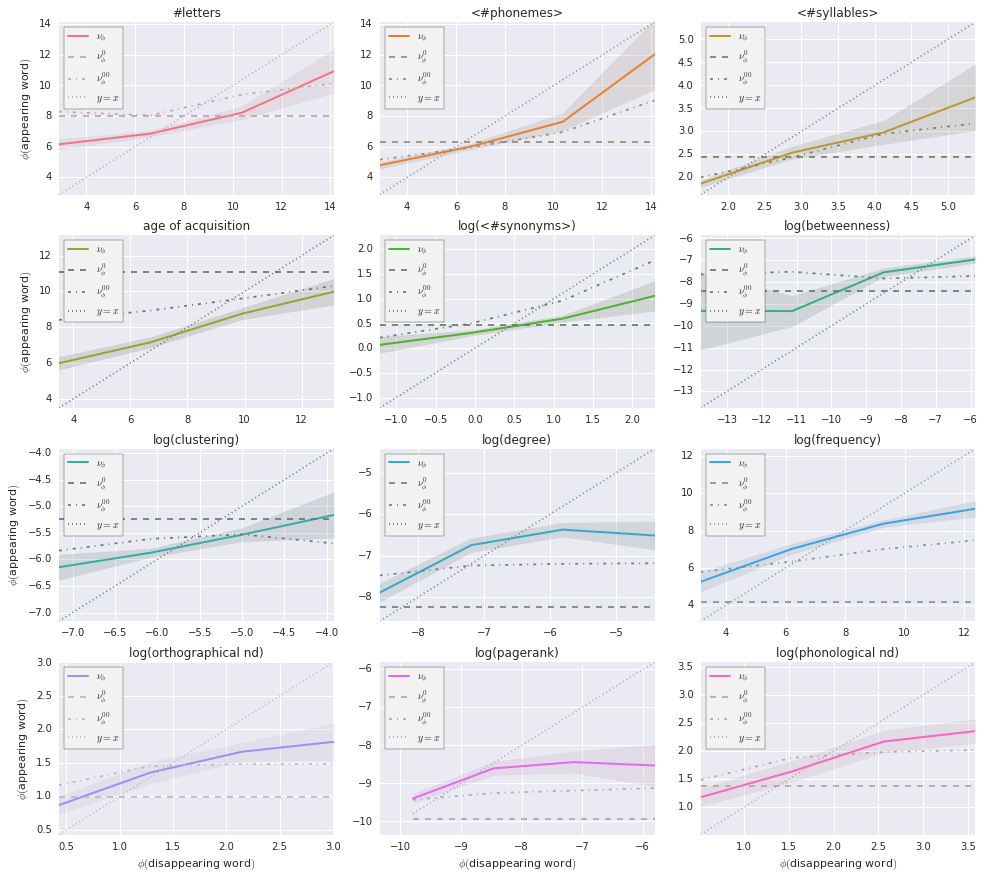

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

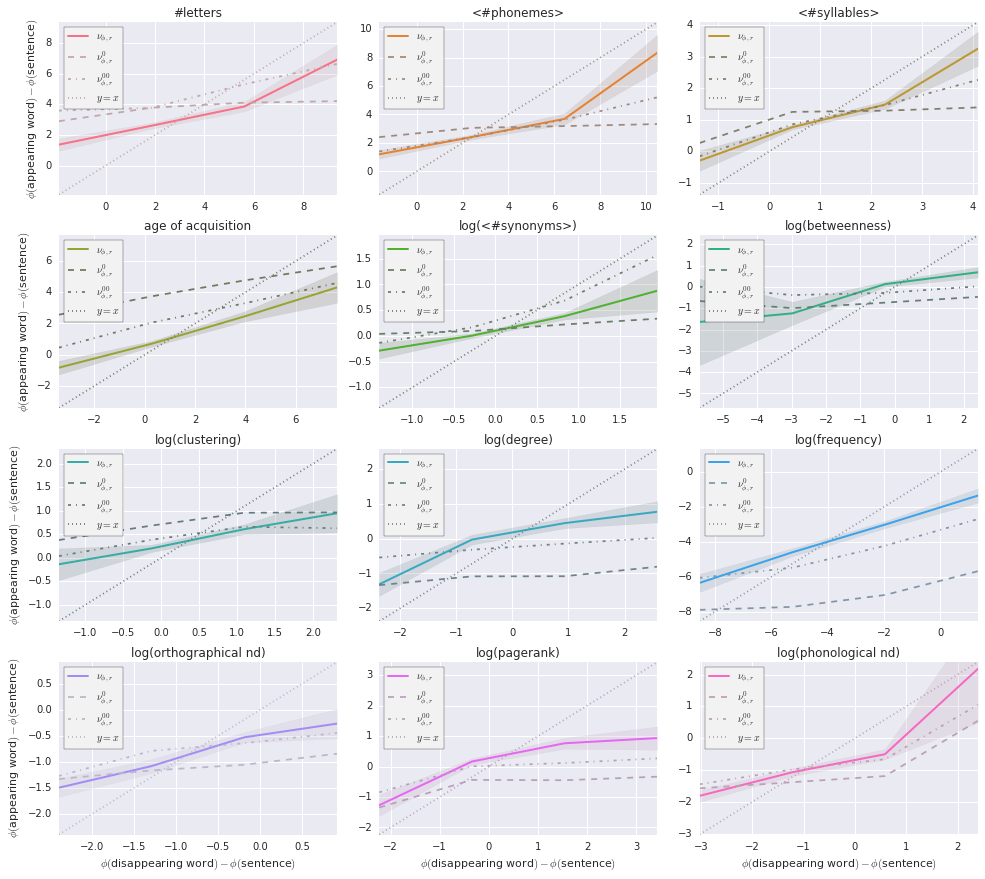

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

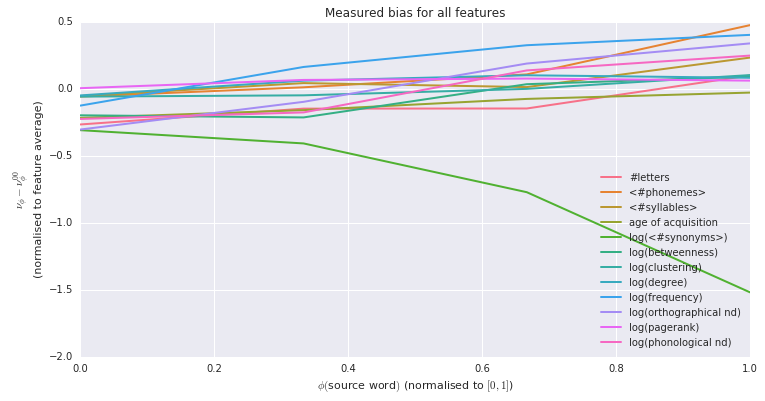

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

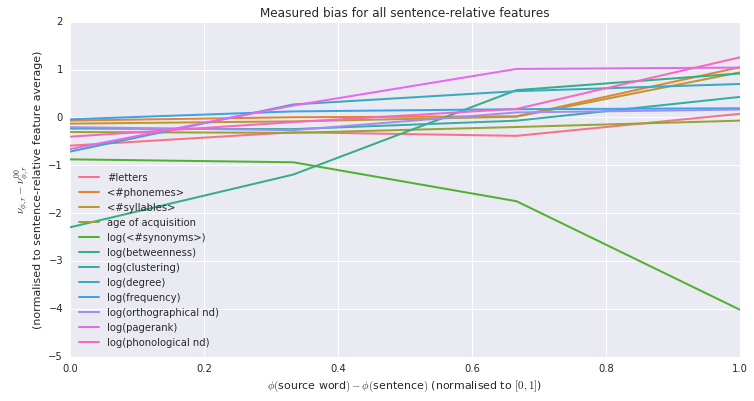

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

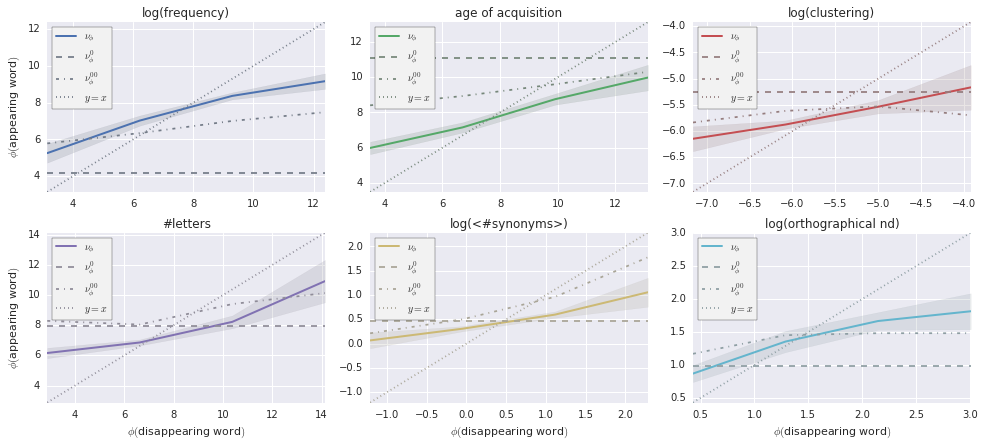

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

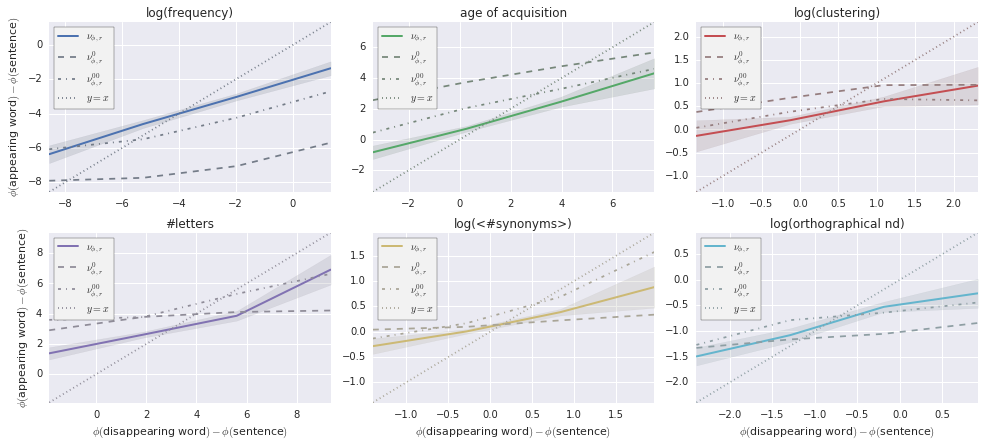

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

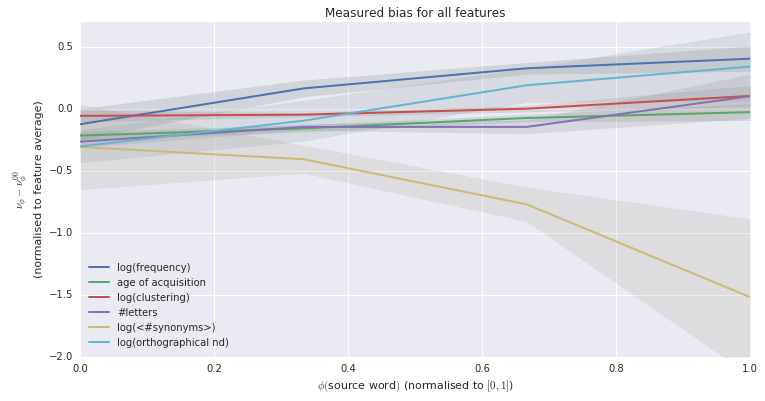

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

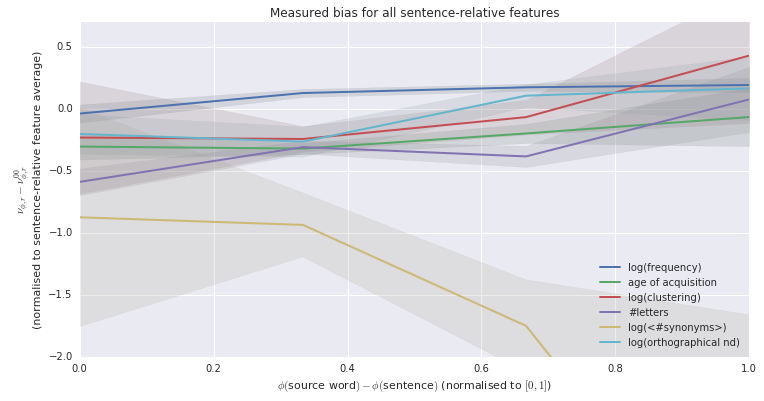

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


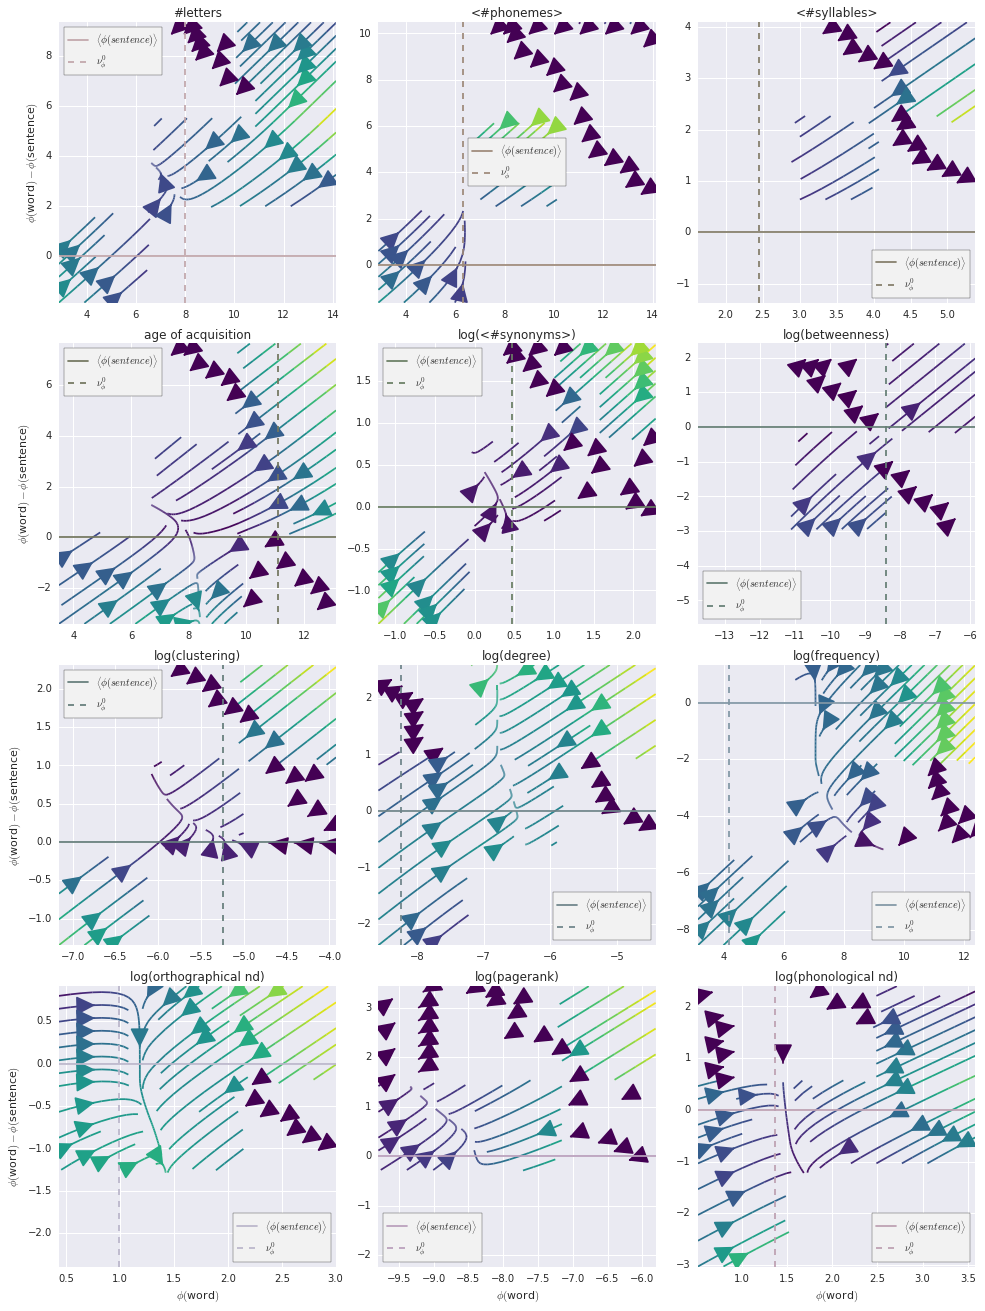

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


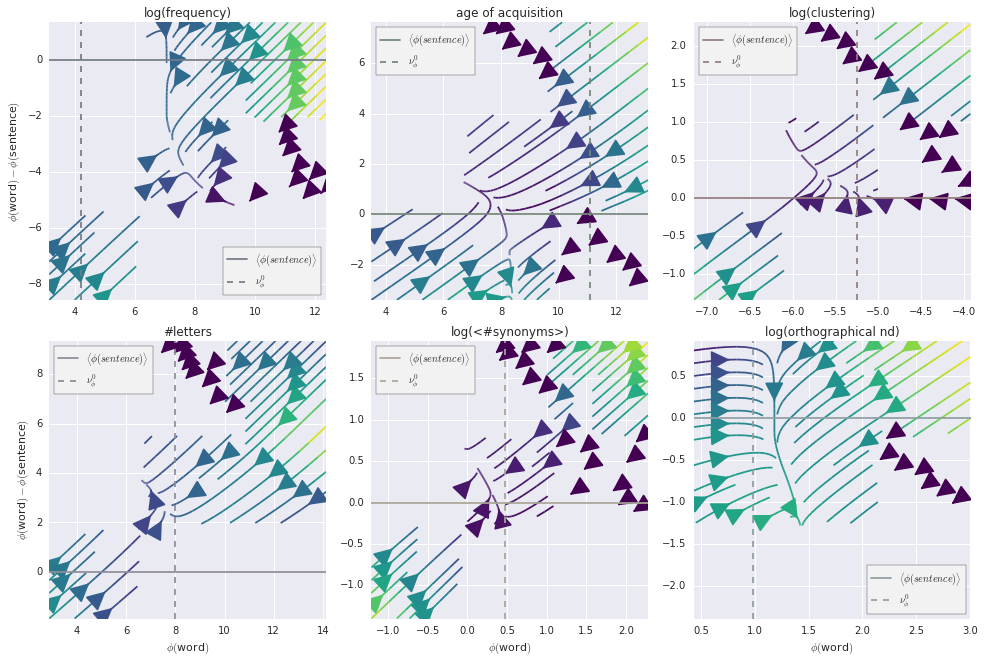

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.51785044  0.19868166  0.07871087  0.07040125  0.03125177  0.02942545
  0.02013668  0.01816313  0.01380503  0.01005046]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographical_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,0.531393,-0.261273,0.084022,-0.228353,-0.197145,0.426416,-0.214203,-0.258914,0.394981,-0.275894,0.156151,-0.005187
Component-1,0.374865,-0.362286,0.133359,-0.293268,-0.226326,-0.442860,0.185813,-0.277095,-0.429290,0.242441,-0.148322,0.026670
Component-2,0.323397,-0.120660,-0.051652,-0.025105,0.933299,-0.046756,-0.000935,-0.047329,-0.014770,0.026311,-0.002402,-0.034168


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 11152) |           | Elapsed Time: 0:00:44 ETA:  5 days, 16:53:35

  0% (  108 of 11152) |                    | Elapsed Time: 0:00:45 ETA:  0:00:59

  1% (  140 of 11152) |                    | Elapsed Time: 0:00:45 ETA:  0:00:54

  2% (  279 of 11152) |                    | Elapsed Time: 0:00:46 ETA:  0:00:50

  3% (  419 of 11152) |                    | Elapsed Time: 0:00:47 ETA:  0:00:49

  4% (  529 of 11152) |                    | Elapsed Time: 0:00:48 ETA:  0:00:49

  5% (  558 of 11152) |#                   | Elapsed Time: 0:00:49 ETA:  0:00:48

  6% (  698 of 11152) |#                   | Elapsed Time: 0:00:50 ETA:  0:00:44

  7% (  782 of 11152) |#                   | Elapsed Time: 0:00:51 ETA:  0:00:49

  7% (  837 of 11152) |#                   | Elapsed Time: 0:00:51 ETA:  0:00:48

  8% (  953 of 11152) |#                   | Elapsed Time: 0:00:52 ETA:  0:00:47

  8% (  976 of 11152) |#                   | Elapsed Time: 0:00:52 ETA:  0:00:49

  9% ( 1078 of 11152) |#                   | Elapsed Time: 0:00:53 ETA:  0:00:49

 10% ( 1116 of 11152) |##                  | Elapsed Time: 0:00:54 ETA:  0:00:48

 11% ( 1255 of 11152) |##                  | Elapsed Time: 0:00:55 ETA:  0:00:46

 12% ( 1395 of 11152) |##                  | Elapsed Time: 0:00:56 ETA:  0:00:40

 13% ( 1534 of 11152) |##                  | Elapsed Time: 0:00:57 ETA:  0:00:37

 15% ( 1673 of 11152) |###                 | Elapsed Time: 0:00:58 ETA:  0:00:31

 15% ( 1784 of 11152) |###                 | Elapsed Time: 0:00:59 ETA:  0:00:32

 16% ( 1813 of 11152) |###                 | Elapsed Time: 0:01:00 ETA:  0:00:32

 17% ( 1927 of 11152) |###                 | Elapsed Time: 0:01:01 ETA:  0:00:32

 17% ( 1952 of 11152) |###                 | Elapsed Time: 0:01:01 ETA:  0:00:33

 18% ( 2060 of 11152) |###                 | Elapsed Time: 0:01:02 ETA:  0:00:33

 18% ( 2092 of 11152) |###                 | Elapsed Time: 0:01:02 ETA:  0:00:34

 20% ( 2231 of 11152) |####                | Elapsed Time: 0:01:03 ETA:  0:00:33

 20% ( 2340 of 11152) |####                | Elapsed Time: 0:01:04 ETA:  0:00:33

 21% ( 2370 of 11152) |####                | Elapsed Time: 0:01:04 ETA:  0:00:32

 22% ( 2510 of 11152) |####                | Elapsed Time: 0:01:05 ETA:  0:00:27

 23% ( 2606 of 11152) |####                | Elapsed Time: 0:01:06 ETA:  0:00:29

 23% ( 2649 of 11152) |####                | Elapsed Time: 0:01:07 ETA:  0:00:29

 25% ( 2789 of 11152) |#####               | Elapsed Time: 0:01:08 ETA:  0:00:26

 26% ( 2928 of 11152) |#####               | Elapsed Time: 0:01:09 ETA:  0:00:24

 27% ( 3067 of 11152) |#####               | Elapsed Time: 0:01:10 ETA:  0:00:24

 28% ( 3182 of 11152) |#####               | Elapsed Time: 0:01:11 ETA:  0:00:24

 28% ( 3207 of 11152) |#####               | Elapsed Time: 0:01:11 ETA:  0:00:20

 30% ( 3346 of 11152) |######              | Elapsed Time: 0:01:12 ETA:  0:00:15

 31% ( 3486 of 11152) |######              | Elapsed Time: 0:01:14 ETA:  0:00:16

 32% ( 3625 of 11152) |######              | Elapsed Time: 0:01:15 ETA:  0:00:14

 33% ( 3764 of 11152) |######              | Elapsed Time: 0:01:16 ETA:  0:00:12

 35% ( 3904 of 11152) |#######             | Elapsed Time: 0:01:17 ETA:  0:00:10

 35% ( 3984 of 11152) |#######             | Elapsed Time: 0:01:18 ETA:  0:00:17

 36% ( 4043 of 11152) |#######             | Elapsed Time: 0:01:18 ETA:  0:00:17

 37% ( 4149 of 11152) |#######             | Elapsed Time: 0:01:19 ETA:  0:00:18

 37% ( 4183 of 11152) |#######             | Elapsed Time: 0:01:20 ETA:  0:00:19

 38% ( 4285 of 11152) |#######             | Elapsed Time: 0:01:21 ETA:  0:00:20

 38% ( 4322 of 11152) |#######             | Elapsed Time: 0:01:21 ETA:  0:00:24

 40% ( 4461 of 11152) |########            | Elapsed Time: 0:01:22 ETA:  0:00:23

 40% ( 4569 of 11152) |########            | Elapsed Time: 0:01:23 ETA:  0:00:21

 41% ( 4601 of 11152) |########            | Elapsed Time: 0:01:23 ETA:  0:00:16

 42% ( 4740 of 11152) |########            | Elapsed Time: 0:01:25 ETA:  0:00:13

 43% ( 4841 of 11152) |########            | Elapsed Time: 0:01:26 ETA:  0:00:14

 43% ( 4880 of 11152) |########            | Elapsed Time: 0:01:26 ETA:  0:00:12

 44% ( 4992 of 11152) |########            | Elapsed Time: 0:01:27 ETA:  0:00:10

 45% ( 5019 of 11152) |#########           | Elapsed Time: 0:01:27 ETA:  0:00:13

 46% ( 5158 of 11152) |#########           | Elapsed Time: 0:01:28 ETA:  0:00:09

 47% ( 5267 of 11152) |#########           | Elapsed Time: 0:01:29 ETA:  0:00:08

 47% ( 5298 of 11152) |#########           | Elapsed Time: 0:01:30 ETA:  0:00:10

 48% ( 5437 of 11152) |#########           | Elapsed Time: 0:01:31 ETA:  0:00:03

 49% ( 5553 of 11152) |#########           | Elapsed Time: 0:01:32 ETA:  0:00:02

 50% ( 5577 of 11152) |##########          | Elapsed Time: 0:01:32 ETA:  0:00:03

 51% ( 5716 of 11152) |##########          | Elapsed Time: 0:01:33 ETA:  0:00:02

 52% ( 5855 of 11152) |##########          | Elapsed Time: 0:01:34 ETA:  0:00:00

 53% ( 5995 of 11152) |##########          | Elapsed Time: 0:01:36 ETA:  0:00:01

 55% ( 6134 of 11152) |###########         | Elapsed Time: 0:01:37 ETA:  0:00:00

 56% ( 6274 of 11152) |###########         | Elapsed Time: 0:01:38 ETA:  0:00:00

 57% ( 6413 of 11152) |###########         | Elapsed Time: 0:01:39 ETA:  0:00:00

 58% ( 6524 of 11152) |###########         | Elapsed Time: 0:01:40 ETA:  0:00:00

 58% ( 6552 of 11152) |###########         | Elapsed Time: 0:01:40 ETA:  0:00:00

 60% ( 6692 of 11152) |############        | Elapsed Time: 0:01:41 ETA:  0:00:00

 61% ( 6831 of 11152) |############        | Elapsed Time: 0:01:42 ETA:  0:00:00

 62% ( 6971 of 11152) |############        | Elapsed Time: 0:01:43 ETA:  0:00:00

 63% ( 7110 of 11152) |############        | Elapsed Time: 0:01:45 ETA:  0:00:00

 65% ( 7249 of 11152) |#############       | Elapsed Time: 0:01:46 ETA:  0:00:00

 66% ( 7389 of 11152) |#############       | Elapsed Time: 0:01:47 ETA:  0:00:00

 67% ( 7528 of 11152) |#############       | Elapsed Time: 0:01:48 ETA:  0:00:00

 68% ( 7636 of 11152) |#############       | Elapsed Time: 0:01:49 ETA:  0:00:00

 68% ( 7668 of 11152) |#############       | Elapsed Time: 0:01:49 ETA:  0:00:00

 69% ( 7741 of 11152) |#############       | Elapsed Time: 0:01:50 ETA:  0:00:00

 70% ( 7807 of 11152) |##############      | Elapsed Time: 0:01:51 ETA:  0:00:00

 71% ( 7946 of 11152) |##############      | Elapsed Time: 0:01:52 ETA:  0:00:00

 72% ( 8086 of 11152) |##############      | Elapsed Time: 0:01:53 ETA:  0:00:00

 73% ( 8225 of 11152) |##############      | Elapsed Time: 0:01:54 ETA:  0:00:00

 75% ( 8365 of 11152) |###############     | Elapsed Time: 0:01:55 ETA:  0:00:00

 76% ( 8504 of 11152) |###############     | Elapsed Time: 0:01:56 ETA:  0:00:00

 77% ( 8643 of 11152) |###############     | Elapsed Time: 0:01:57 ETA:  0:00:00

 78% ( 8783 of 11152) |###############     | Elapsed Time: 0:01:58 ETA:  0:00:00

 80% ( 8922 of 11152) |################    | Elapsed Time: 0:01:59 ETA:  0:00:00

 80% ( 9029 of 11152) |################    | Elapsed Time: 0:02:00 ETA:  0:00:00

 81% ( 9062 of 11152) |################    | Elapsed Time: 0:02:01 ETA:  0:00:00

 82% ( 9201 of 11152) |################    | Elapsed Time: 0:02:02 ETA:  0:00:00

 83% ( 9340 of 11152) |################    | Elapsed Time: 0:02:03 ETA:  0:00:00

 85% ( 9480 of 11152) |#################   | Elapsed Time: 0:02:04 ETA:  0:00:00

 86% ( 9619 of 11152) |#################   | Elapsed Time: 0:02:05 ETA:  0:00:00

 87% ( 9759 of 11152) |#################   | Elapsed Time: 0:02:06 ETA:  0:00:00

 88% ( 9898 of 11152) |#################   | Elapsed Time: 0:02:07 ETA:  0:00:00

 90% (10037 of 11152) |##################  | Elapsed Time: 0:02:08 ETA:  0:00:00

 91% (10177 of 11152) |##################  | Elapsed Time: 0:02:09 ETA:  0:00:00

 92% (10316 of 11152) |##################  | Elapsed Time: 0:02:10 ETA:  0:00:00

 93% (10456 of 11152) |##################  | Elapsed Time: 0:02:11 ETA:  0:00:00

 95% (10595 of 11152) |################### | Elapsed Time: 0:02:12 ETA:  0:00:00

 96% (10734 of 11152) |################### | Elapsed Time: 0:02:13 ETA:  0:00:00

 97% (10874 of 11152) |################### | Elapsed Time: 0:02:14 ETA:  0:00:00

 98% (11013 of 11152) |################### | Elapsed Time: 0:02:15 ETA:  0:00:00

100% (11152 of 11152) |####################| Elapsed Time: 0:02:16 Time: 0:02:16


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

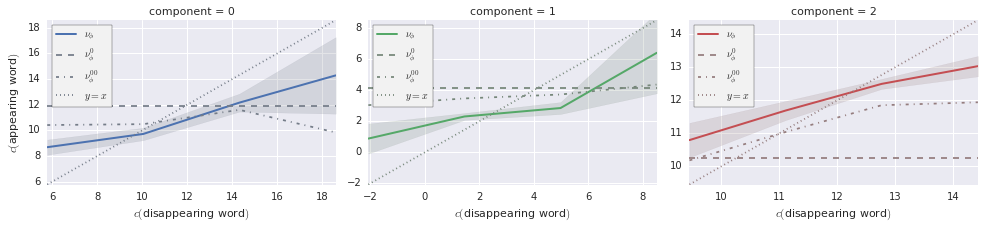

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.55814635  0.19780771  0.14682365]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographical_density,synonyms_count
Component-0,0.752078,0.102737,-0.296483,0.517980,-0.259801,-0.011056
Component-1,0.421227,0.148210,-0.418700,-0.737716,0.284406,0.013432
Component-2,0.489395,-0.054783,0.844981,-0.195298,0.043877,-0.058579


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 11152) |            | Elapsed Time: 0:00:13 ETA:  1 day, 16:26:35

  1% (  140 of 11152) |                    | Elapsed Time: 0:00:14 ETA:  0:01:17

  2% (  279 of 11152) |                    | Elapsed Time: 0:00:15 ETA:  0:01:12

  3% (  419 of 11152) |                    | Elapsed Time: 0:00:16 ETA:  0:01:11

  5% (  558 of 11152) |#                   | Elapsed Time: 0:00:17 ETA:  0:01:11

  6% (  698 of 11152) |#                   | Elapsed Time: 0:00:18 ETA:  0:01:08

  7% (  808 of 11152) |#                   | Elapsed Time: 0:00:19 ETA:  0:01:10

  7% (  837 of 11152) |#                   | Elapsed Time: 0:00:19 ETA:  0:01:10

  8% (  976 of 11152) |#                   | Elapsed Time: 0:00:20 ETA:  0:01:10

 10% ( 1116 of 11152) |##                  | Elapsed Time: 0:00:22 ETA:  0:01:08

 11% ( 1255 of 11152) |##                  | Elapsed Time: 0:00:23 ETA:  0:01:06

 12% ( 1395 of 11152) |##                  | Elapsed Time: 0:00:24 ETA:  0:01:01

 13% ( 1534 of 11152) |##                  | Elapsed Time: 0:00:25 ETA:  0:00:59

 15% ( 1673 of 11152) |###                 | Elapsed Time: 0:00:26 ETA:  0:00:56

 16% ( 1813 of 11152) |###                 | Elapsed Time: 0:00:27 ETA:  0:00:55

 17% ( 1952 of 11152) |###                 | Elapsed Time: 0:00:28 ETA:  0:00:55

 18% ( 2092 of 11152) |###                 | Elapsed Time: 0:00:29 ETA:  0:00:56

 20% ( 2231 of 11152) |####                | Elapsed Time: 0:00:30 ETA:  0:00:54

 21% ( 2370 of 11152) |####                | Elapsed Time: 0:00:31 ETA:  0:00:56

 22% ( 2510 of 11152) |####                | Elapsed Time: 0:00:32 ETA:  0:00:54

 23% ( 2612 of 11152) |####                | Elapsed Time: 0:00:33 ETA:  0:00:56

 23% ( 2649 of 11152) |####                | Elapsed Time: 0:00:34 ETA:  0:00:57

 25% ( 2789 of 11152) |#####               | Elapsed Time: 0:00:34 ETA:  0:00:53

 26% ( 2928 of 11152) |#####               | Elapsed Time: 0:00:36 ETA:  0:00:53

 27% ( 3067 of 11152) |#####               | Elapsed Time: 0:00:37 ETA:  0:00:51

 28% ( 3207 of 11152) |#####               | Elapsed Time: 0:00:38 ETA:  0:00:50

 30% ( 3346 of 11152) |######              | Elapsed Time: 0:00:39 ETA:  0:00:43

 31% ( 3486 of 11152) |######              | Elapsed Time: 0:00:40 ETA:  0:00:43

 32% ( 3625 of 11152) |######              | Elapsed Time: 0:00:41 ETA:  0:00:42

 33% ( 3764 of 11152) |######              | Elapsed Time: 0:00:42 ETA:  0:00:40

 35% ( 3904 of 11152) |#######             | Elapsed Time: 0:00:43 ETA:  0:00:38

 35% ( 3995 of 11152) |#######             | Elapsed Time: 0:00:44 ETA:  0:00:45

 36% ( 4043 of 11152) |#######             | Elapsed Time: 0:00:44 ETA:  0:00:45

 37% ( 4183 of 11152) |#######             | Elapsed Time: 0:00:45 ETA:  0:00:46

 38% ( 4293 of 11152) |#######             | Elapsed Time: 0:00:46 ETA:  0:00:47

 38% ( 4322 of 11152) |#######             | Elapsed Time: 0:00:47 ETA:  0:00:50

 40% ( 4461 of 11152) |########            | Elapsed Time: 0:00:48 ETA:  0:00:46

 41% ( 4601 of 11152) |########            | Elapsed Time: 0:00:49 ETA:  0:00:47

 42% ( 4740 of 11152) |########            | Elapsed Time: 0:00:50 ETA:  0:00:42

 43% ( 4880 of 11152) |########            | Elapsed Time: 0:00:51 ETA:  0:00:41

 45% ( 5019 of 11152) |#########           | Elapsed Time: 0:00:52 ETA:  0:00:37

 46% ( 5158 of 11152) |#########           | Elapsed Time: 0:00:53 ETA:  0:00:37

 47% ( 5298 of 11152) |#########           | Elapsed Time: 0:00:55 ETA:  0:00:36

 48% ( 5437 of 11152) |#########           | Elapsed Time: 0:00:56 ETA:  0:00:31

 49% ( 5555 of 11152) |#########           | Elapsed Time: 0:00:57 ETA:  0:00:30

 50% ( 5577 of 11152) |##########          | Elapsed Time: 0:00:57 ETA:  0:00:32

 51% ( 5716 of 11152) |##########          | Elapsed Time: 0:00:58 ETA:  0:00:31

 52% ( 5831 of 11152) |##########          | Elapsed Time: 0:00:59 ETA:  0:00:32

 52% ( 5855 of 11152) |##########          | Elapsed Time: 0:00:59 ETA:  0:00:32

 53% ( 5995 of 11152) |##########          | Elapsed Time: 0:01:00 ETA:  0:00:29

 55% ( 6134 of 11152) |###########         | Elapsed Time: 0:01:01 ETA:  0:00:31

 56% ( 6274 of 11152) |###########         | Elapsed Time: 0:01:02 ETA:  0:00:25

 57% ( 6413 of 11152) |###########         | Elapsed Time: 0:01:03 ETA:  0:00:21

 58% ( 6552 of 11152) |###########         | Elapsed Time: 0:01:04 ETA:  0:00:19

 60% ( 6692 of 11152) |############        | Elapsed Time: 0:01:05 ETA:  0:00:17

 61% ( 6831 of 11152) |############        | Elapsed Time: 0:01:06 ETA:  0:00:14

 62% ( 6971 of 11152) |############        | Elapsed Time: 0:01:07 ETA:  0:00:12

 63% ( 7110 of 11152) |############        | Elapsed Time: 0:01:08 ETA:  0:00:10

 65% ( 7249 of 11152) |#############       | Elapsed Time: 0:01:09 ETA:  0:00:08

 66% ( 7389 of 11152) |#############       | Elapsed Time: 0:01:10 ETA:  0:00:07

 67% ( 7528 of 11152) |#############       | Elapsed Time: 0:01:11 ETA:  0:00:03

 68% ( 7668 of 11152) |#############       | Elapsed Time: 0:01:12 ETA:  0:00:02

 70% ( 7807 of 11152) |##############      | Elapsed Time: 0:01:13 ETA:  0:00:01

 71% ( 7946 of 11152) |##############      | Elapsed Time: 0:01:14 ETA:  0:00:00

 72% ( 8086 of 11152) |##############      | Elapsed Time: 0:01:15 ETA:  0:00:00

 73% ( 8225 of 11152) |##############      | Elapsed Time: 0:01:16 ETA:  0:00:00

 75% ( 8365 of 11152) |###############     | Elapsed Time: 0:01:17 ETA:  0:00:03

 76% ( 8504 of 11152) |###############     | Elapsed Time: 0:01:18 ETA:  0:00:02

 77% ( 8643 of 11152) |###############     | Elapsed Time: 0:01:19 ETA:  0:00:00

 78% ( 8783 of 11152) |###############     | Elapsed Time: 0:01:20 ETA:  0:00:00

 80% ( 8922 of 11152) |################    | Elapsed Time: 0:01:21 ETA:  0:00:00

 80% ( 9031 of 11152) |################    | Elapsed Time: 0:01:22 ETA:  0:00:00

 81% ( 9062 of 11152) |################    | Elapsed Time: 0:01:22 ETA:  0:00:00

 82% ( 9201 of 11152) |################    | Elapsed Time: 0:01:23 ETA:  0:00:00

 83% ( 9340 of 11152) |################    | Elapsed Time: 0:01:24 ETA:  0:00:02

 85% ( 9480 of 11152) |#################   | Elapsed Time: 0:01:25 ETA:  0:00:00

 86% ( 9619 of 11152) |#################   | Elapsed Time: 0:01:26 ETA:  0:00:00

 87% ( 9759 of 11152) |#################   | Elapsed Time: 0:01:27 ETA:  0:00:00

 88% ( 9898 of 11152) |#################   | Elapsed Time: 0:01:28 ETA:  0:00:00

 90% (10037 of 11152) |##################  | Elapsed Time: 0:01:29 ETA:  0:00:00

 91% (10177 of 11152) |##################  | Elapsed Time: 0:01:30 ETA:  0:00:00

 92% (10316 of 11152) |##################  | Elapsed Time: 0:01:31 ETA:  0:00:00

 93% (10456 of 11152) |##################  | Elapsed Time: 0:01:32 ETA:  0:00:00

 95% (10595 of 11152) |################### | Elapsed Time: 0:01:33 ETA:  0:00:00

 96% (10734 of 11152) |################### | Elapsed Time: 0:01:34 ETA:  0:00:00

 97% (10874 of 11152) |################### | Elapsed Time: 0:01:35 ETA:  0:00:00

 98% (11013 of 11152) |################### | Elapsed Time: 0:01:36 ETA:  0:00:00

100% (11152 of 11152) |####################| Elapsed Time: 0:01:37 Time: 0:01:37


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

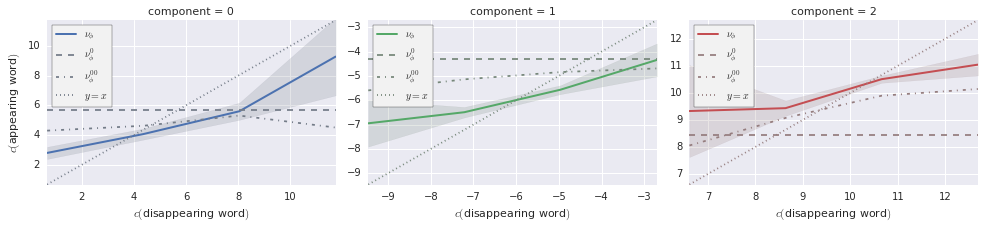

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographical_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1343 (cluster-unique) substitutions, but the PCA is in fact computed on 420 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.